# Spaceship_Titanic_Rescue 

## Importing Required Libraries

In [1]:
#importing required libraries

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
#cross_validate: A function from scikit-learn that performs cross-validation on a given model and dataset.

#That line of code sets the maximum number of columns displayed when you print a DataFrame using pandas in Python.
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)

#This line of code sets the display format for floating-point numbers in pandas DataFrames.
#By default, pandas displays floating-point numbers with many decimal places. 
#However, this line of code changes that default behavior by formatting the floating-point numbers to display only one decimal place.
#The lambda x: '%.1f' % x part is a lambda function that formats each floating-point number x to have one decimal place (%.1f).
pd.set_option('display.float_format', lambda x: '%.1f' % x)

#This line of code sets the maximum width, in characters, of the display output when printing pandas DataFrames. 
#By default, pandas may truncate the display output horizontally if it's too wide to fit in the terminal or console window.
#This code ensures that the display output will be formatted to fit within 500 characters horizontally. 
#This can be particularly useful when dealing with DataFrames with a large number of columns, preventing them from being truncated and allowing you to view more of the DataFrame's content without horizontal scrolling.
pd.set_option('display.width', 500)

import warnings
warnings.simplefilter(action='ignore')


##### warnings
The code warnings.simplefilter(action='ignore') is used in Python to modify how warning messages are handled. Here's a breakdown of what it does:

warnings: This is the Python module that provides a way to issue warning messages.
simplefilter(action='ignore'): This function within the warnings module sets a filter to determine what action to take when a warning is issued.
By setting the action to 'ignore', the code tells Python to ignore all warning messages. This means that any warning that would normally be printed to the console or logged will be suppressed and not shown to the user.

This can be useful in situations where you want to suppress non-critical warnings that you are already aware of and do not want to clutter the output, but it should be used with caution. Ignoring warnings can sometimes hide important information about potential issues in the code.

## 2. Loading the Dataset

In [2]:
#loading the dataset in pandas dataframe
train = pd.read_csv('train (1).csv')
test = pd.read_csv('test.csv')

## 3. EDA
Exploratory Data Analysis (EDA) is a crucial initial step in data science projects. It involves analyzing and visualizing data to understand its key characteristics, uncover patterns, and identify relationships between variables refers to the method of studying and exploring record sets to apprehend their predominant traits, discover patterns, locate outliers, and identify relationships between variables.Analyse and summarise data.

In [3]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination  Age    VIP  RoomService  FoodCourt  ShoppingMall    Spa  VRDeck               Name  Transported
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e 39.0  False          0.0        0.0           0.0    0.0     0.0    Maham Ofracculy        False
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e 24.0  False        109.0        9.0          25.0  549.0    44.0       Juanna Vines         True
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e 58.0   True         43.0     3576.0           0.0 6715.0    49.0      Altark Susent        False
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e 33.0  False          0.0     1283.0         371.0 3329.0   193.0       Solam Susent        False
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e 16.0  False        303.0       70.0         151.0  565.0     2.0  Willy Santantines         True

In [4]:
test.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination  Age    VIP  RoomService  FoodCourt  ShoppingMall    Spa  VRDeck              Name
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e 27.0  False          0.0        0.0           0.0    0.0     0.0   Nelly Carsoning
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e 19.0  False          0.0        9.0           0.0 2823.0     0.0    Lerome Peckers
2     0019_01     Europa      True  C/0/S  55 Cancri e 31.0  False          0.0        0.0           0.0    0.0     0.0   Sabih Unhearfus
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e 38.0  False          0.0     6652.0           0.0  181.0   585.0  Meratz Caltilter
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e 20.0  False         10.0        0.0         635.0    0.0     0.0   Brence Harperez

In [5]:
def df_info(df):
   
    print('-------------------------------------------------------------------------------------------------------')
    print('Shape of DataFrame\n',df.shape)
    print('-------------------------------------------------------------------------------------------------------')
    print('Size of DataFrame\n',df.size)
    print('-------------------------------------------------------------------------------------------------------')
    print('Information of DataFrame\n',df.info())
    print('-------------------------------------------------------------------------------------------------------')
    print('Description of DataFrame\n',df.describe())
    print('-------------------------------------------------------------------------------------------------------')
    print('Columns in DataFrame\n',df.columns)
    print('-------------------------------------------------------------------------------------------------------')
    print('Data Types in DataFrame\n',df.dtypes)
    print('-------------------------------------------------------------------------------------------------------')
    print('Null Values in DataFrame\n',df.isnull().sum())
    print('-------------------------------------------------------------------------------------------------------')


In [6]:
df_info(train)

-------------------------------------------------------------------------------------------------------
Shape of DataFrame
 (8693, 14)
-------------------------------------------------------------------------------------------------------
Size of DataFrame
 121702
-------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa

In [7]:
df_info(test)

-------------------------------------------------------------------------------------------------------
Shape of DataFrame
 (4277, 13)
-------------------------------------------------------------------------------------------------------
Size of DataFrame
 55601
-------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa 

### 3.1 Data Preprocessing
Data preprocessing is an important step that involves cleaning and transforming raw data to make it suitable for analysis

#### 3.1.1 Categorization of Columns : categorical, numerical and cardinal(used for counting or with really more unique values to catgorize from)

In [8]:
#The categorize columns function is designed to categorize the columns of a pandas DataFrame into different types: categorical columns, numerical columns, and a special category for high cardinality categorical columns. 
def categorize_columns(dataframe, cat_th=10, car_th=20):
    #cat_th: Threshold for numerical columns to be considered categorical if they have fewer unique values than this threshold (default is 10).
    #car_th: Threshold for categorical columns to be considered as high cardinality if they have more unique values than this threshold (default is 20).

    #A list comprehension that includes columns with the data type object (typically used for strings) in the DataFrame. 
    #These are the initial set of categorical columns.
    cat_cols    = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    #A list comprehension that includes columns that are not of type object, but have fewer unique values than cat_th. 
    #These are numerical columns with low cardinality that can be treated as categorical.
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    
    #A list comprehension that includes columns of type object with more unique values than car_th. 
    #These are high cardinality categorical columns.
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    
    #cat_cols is updated to include both the original categorical columns and the low cardinality numerical columns (num_but_cat)
    cat_cols    = cat_cols + num_but_cat
    
    #columns in cat_but_car are removed from cat_cols to ensure high cardinality categorical columns are not included in the general categorical columns.
    cat_cols    = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    #A list comprehension that includes columns not of type object, thus identifying numerical columns.
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    
    #Columns identified as low cardinality numerical columns (num_but_cat) are removed from num_cols.
    num_cols = [col for col in num_cols if col not in num_but_cat]

    #The function prints a summary of the DataFrame including the number of observations (rows), the number of variables (columns), and the counts of each type of column identified.
    print(f"observations: {dataframe.shape[0]}")
    print(f"variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    #The function returns three lists: cat_cols (categorical columns including low cardinality numerical columns), num_cols (pure numerical columns excluding low cardinality ones), and cat_but_car (high cardinality categorical columns).
    return cat_cols, num_cols, cat_but_car


In [9]:
#The function returns three lists:
#cat_cols: List of columns categorized as categorical (including low cardinality numerical columns).
#num_cols: List of columns categorized as numerical (excluding low cardinality numerical columns).
#cat_but_car: List of columns categorized as high cardinality categorical.

In [10]:
cat_cols, num_cols, cat_but_car = categorize_columns(train)

observations: 8693
variables: 14
cat_cols: 5
num_cols: 6
cat_but_car: 3
num_but_cat: 1


In [11]:
cat_cols1, num_cols1, cat_but_car1 = categorize_columns(test)

observations: 4277
variables: 13
cat_cols: 4
num_cols: 6
cat_but_car: 3
num_but_cat: 0


In [12]:
cat_cols

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']

In [13]:
num_cols

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [14]:
cat_but_car

['PassengerId', 'Cabin', 'Name']

cabin has three part : deck/ cabin number/ side
cabin id=deck+cabin number

In [15]:
#train['Cabin']=extracts the Cabin column from the train DataFrame.
#The .str accessor allows vectorized (to access each element without applying loop) string functions to be applied to each element of the column.
#.split('/') splits each string in the Cabin column at each occurrence of the '/' character, returning a Series of lists.
#The expand=True parameter specifies that the result should be expanded into a DataFrame with separate columns for each part of the split strings.
#The result is assigned to a new DataFrame cabin_df_train

In [16]:
cabin_train = train['Cabin'].str.split('/',expand = True)
cabin_test  = test['Cabin'].str.split('/',expand = True)

In [17]:
# Naming the columns in cabin df
cabin_train.columns = ["Cabin_DECK", "Cabin_NUM", "Cabin_SIDE"]
cabin_test.columns  = ["Cabin_DECK", "Cabin_NUM", "Cabin_SIDE"]

In [18]:
#dropping cabin columns from train and test dataframe
train = train.drop("Cabin", axis=1)
test  = test.drop("Cabin", axis=1)

In [19]:
# combining train and cabin_train df
#combining test and cabin_test df
train = pd.concat([train,cabin_train], axis=1)
test = pd.concat([test,cabin_test], axis=1)

In [20]:
#applying the categorize_columns function to both your training (train) and test (test) DataFrames.
#This allows you to identify and categorize the columns into categorical columns (cat_cols), numerical columns (num_cols), and high cardinality categorical columns (cat_but_car) for both DataFrames.
print('--------------------Train---------------------')
cat_cols_train, num_cols_train, cat_but_car_train = categorize_columns(train)
print('----------------------Test--------------------')
cat_cols_test, num_cols_test, cat_but_car_test = categorize_columns(test)
print('----------------------------------------------')

--------------------Train---------------------
observations: 8693
variables: 16
cat_cols: 7
num_cols: 6
cat_but_car: 3
num_but_cat: 1
----------------------Test--------------------
observations: 4277
variables: 15
cat_cols: 6
num_cols: 6
cat_but_car: 3
num_but_cat: 0
----------------------------------------------


#### 3.1.2 Threshold and outlier detection

The outlier_thresholds function is designed to calculate the lower and upper limits for detecting outliers in a specified column of a DataFrame. The function uses the interquartile range (IQR) method, but with customizable quantiles.

In [21]:
# dataframe=df to be applied on
#col_name=column name for which the values are to be calculated
#q1=first quartile(default = 0.1 or 10percentile)
#q3=third quartile(default = 0.99 or 99percentile)

def outlier_thresholds(dataframe, col_name, q1=0.1, q3=0.99):
    
    #calculating quartiles
    quartile1 = dataframe[col_name].quantile(q1) # the value below q1
    quartile3 = dataframe[col_name].quantile(q3) #the value below q3
    
    #calculating inter quartile range
    interquantile_range = quartile3 - quartile1
    
    #calculating limit for outliers
    up_limit = quartile3 + 1.5 * interquantile_range # datapoint above this value is an outlier
    low_limit = quartile1 - 1.5 * interquantile_range # datapoint below this valueis an outlier
    return low_limit, up_limit

#the q1 is also included in q3 since q3 counts all values below its specified limit
#the above function is used because the defalt 25% and 75% values are not suitable for this data

In [22]:
#This function replaces outliers with threshold values
def replace_with_thresholds(dataframe, column):
    # calling previous function to calculate thresholds in the given column
    low_limit, up_limit = outlier_thresholds(dataframe, column)
    
    #dataframe.loc[]: This is used to access a group of rows and columns by labels or a boolean array.
    #for values in df which are true will bw replaces by thresholds(either upper or lower in the given column)
    dataframe.loc[(dataframe[column] < low_limit), column] = low_limit
    dataframe.loc[(dataframe[column] > up_limit), column]  = up_limit

In [23]:
#this function checks for any outlier present in the given column
def check_outlier(dataframe, col_name, q1=0.1, q3=0.99):
    
    #calculating thresholds
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    
    #dataframe[...]=selects each row if condition is true for the row
    #OR returns true if one or both conditions are true
    #any(axis=None)=This checks if any element in the resulting DataFrame is True.
    #If there is at least one True value, it returns True; otherwise, it returns False.
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


In [24]:
#num_cols=list of numerical columns in df
#using for loop to iterate over each column name
#assigning each column name to the variable col in each iteration.
for col in num_cols:
    #check for outliers in the given column
    print(col,":", check_outlier(train,col))

Age : False
RoomService : True
FoodCourt : True
ShoppingMall : True
Spa : True
VRDeck : True


In [25]:
#replacing outliers with thresholds
for col in num_cols:
    replace_with_thresholds(train, col)
for col in num_cols:
    replace_with_thresholds(test, col)

In [26]:
for col in num_cols:
    print(col,":", check_outlier(train,col))

Age : False
RoomService : False
FoodCourt : False
ShoppingMall : False
Spa : False
VRDeck : False


In [27]:
for col in num_cols:
    print(col,":", check_outlier(test,col))

Age : False
RoomService : False
FoodCourt : False
ShoppingMall : False
Spa : False
VRDeck : False


#### 3.1.3 Missing value detection and filling places with missing values

In [28]:
#function identifies columns having missing values in it
#na_name: This is a boolean parameter (default is False). 
#If set to True, the function will return the names of the columns with missing values.
def missing_values_table(dataframe, na_name=False):
    
    #create list of column names with missing values (if block checks each column for null values)
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    #na_columns=have columns with null values
    #isnull.summ=counts the null values in each column
    #n_miss=a pandas series with col_name as index and count of null values as values
    #sorting it in descending order
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    
    #percentage of missing values in each column
    #df.shape[0]=gives shape of the dataframe
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    
    #combine n_miss column and ratio
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    
    #end="\n" ensures that the print statement ends with a newline character.
    print(missing_df, end="\n")

    # checks if na_name is True.
    #true=return na_columns(list of columns with null values)
    #false=do not return anything
    if na_name:
        return na_columns


In [29]:
missing_values_table(train)

              n_miss  ratio
CryoSleep        217    2.5
ShoppingMall     208    2.4
VIP              203    2.3
HomePlanet       201    2.3
Name             200    2.3
Cabin_DECK       199    2.3
Cabin_NUM        199    2.3
Cabin_SIDE       199    2.3
VRDeck           188    2.2
FoodCourt        183    2.1
Spa              183    2.1
Destination      182    2.1
RoomService      181    2.1
Age              179    2.1


In [30]:
missing_values_table(test)

              n_miss  ratio
FoodCourt        106    2.5
Spa              101    2.4
Cabin_DECK       100    2.3
Cabin_NUM        100    2.3
Cabin_SIDE       100    2.3
ShoppingMall      98    2.3
Name              94    2.2
CryoSleep         93    2.2
VIP               93    2.2
Destination       92    2.1
Age               91    2.1
HomePlanet        87    2.0
RoomService       82    1.9
VRDeck            80    1.9


In [31]:
# looking into the expenses of passengers
expenses = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

In [32]:
#creating a column for total expenditure by passengers in both train and test df
#axis=1 specifies that the sum should be calculated across the columns (i.e., for each row).
#skipna=True ensures that missing values (NaNs) are ignored in the sum calculation.
train["total_spent"] = train[expenses].sum(axis=1 , skipna=True)
test["total_spent"] = test[expenses].sum(axis=1 , skipna=True)

In [33]:
train["total_spent"].head()

0       0.0
1     736.0
2   10383.0
3    5176.0
4    1091.0
Name: total_spent, dtype: float64

In [34]:
train.total_spent.describe()

count    8693.0
mean     1424.5
std      2696.3
min         0.0
25%         0.0
50%       716.0
75%      1441.0
max     27842.0
Name: total_spent, dtype: float64

In [35]:
#the columns listed in expenses list are deleted
#inplace = True: means the changrs are directly applied to original df and no new df is created
train.drop(columns=expenses,inplace=True)
test.drop(columns=expenses,inplace=True)           

In [36]:
#sorting in descending order according to expenditure
train.sort_values(by="total_spent", ascending=False).head(5)

PassengerId HomePlanet CryoSleep  Destination  Age    VIP               Name  Transported Cabin_DECK Cabin_NUM Cabin_SIDE  total_spent
6509     6866_02     Europa     False  55 Cancri e 40.0  False   Dscha Hetforhaft        False          C       253          S      27842.0
3916     4181_05     Europa     False  55 Cancri e 31.0  False  Wezena Frattyring        False          C       133          P      27705.7
5722     6064_01     Europa     False  55 Cancri e 68.0  False  Markar Radisiouss        False          C       186          P      27054.2
725      0768_01     Europa     False  55 Cancri e 36.0  False     Maiam Oilloody        False          B        32          P      26418.7
154      0177_01     Europa     False  TRAPPIST-1e 38.0  False   Toperon Iniouser        False          B         2          S      25933.2

In [37]:
#age = 0 and expense !=0
train[(train.Age == 0) & (train.total_spent != 0)]

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Destination, Age, VIP, Name, Transported, Cabin_DECK, Cabin_NUM, Cabin_SIDE, total_spent]
Index: []

In [38]:
#age = 0 and expense !=0
test[(test.Age == 0) & (test.total_spent != 0)]

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Destination, Age, VIP, Name, Cabin_DECK, Cabin_NUM, Cabin_SIDE, total_spent]
Index: []

In [39]:
#return only the rows where the Age column is equal to 0 and the total_spent column has missing values (NaN).
train[(train.Age == 0) & (train.total_spent.isna())]

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Destination, Age, VIP, Name, Transported, Cabin_DECK, Cabin_NUM, Cabin_SIDE, total_spent]
Index: []

In [40]:
test[(test.Age == 0) & (test.total_spent.isna())]

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Destination, Age, VIP, Name, Cabin_DECK, Cabin_NUM, Cabin_SIDE, total_spent]
Index: []

In [41]:
 # Update CryoSleep to True if total_spent is 0 and CryoSleep is NaN
train.loc[(train.total_spent == 0) & (train.CryoSleep.isna()), 'CryoSleep'] = True

# Update CryoSleep to False if total_spent is greater than 0 and CryoSleep is NaN
train.loc[(train.total_spent > 0) & (train.CryoSleep.isna()), 'CryoSleep'] = False

In [42]:
#if cryosleep =True then expenditure is 0
train.loc[train.CryoSleep == True, "total_spent"] = train.loc[train.CryoSleep == True, "total_spent"].fillna(0)

In [43]:
# Update CryoSleep to True if total_spent is 0 and CryoSleep is NaN
test.loc[(test.total_spent == 0) & (test.CryoSleep.isna()), 'CryoSleep'] = True

# Update CryoSleep to False if total_spent is greater than 0 and CryoSleep is NaN
test.loc[(test.total_spent > 0) & (test.CryoSleep.isna()), 'CryoSleep'] = False

In [44]:
#if cryosleep =True then expenditure is 0
test.loc[test.CryoSleep == True, "total_spent"] = test.loc[test.CryoSleep == True, "total_spent"].fillna(0)

In [45]:
#filling all numericals column null values expect target column with mean
#dtype!=o checks if dtype is not object
#axis = 0  applies operation to column
#axis=0: The apply method with axis=0 applies the lambda function to each column.
train = train.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" and x.name != "Transported" else x, axis=0)
test  = test.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" and x.name != "Transported" else x, axis=0)

In [46]:
missing_values_table(train)

             n_miss  ratio
VIP             203    2.3
HomePlanet      201    2.3
Name            200    2.3
Cabin_DECK      199    2.3
Cabin_NUM       199    2.3
Cabin_SIDE      199    2.3
Destination     182    2.1


In [47]:
# fill missing values in categorical columns with the mode (most frequent value) if they have 10 or fewer unique values. 
#The Transported column is temporarily removed during this operation and then re-added.
# Remove and store the 'Transported' column
transported_col = train.pop("Transported")

# Fill missing values in categorical columns with the mode if they have 10 or fewer unique values
train = train.apply(lambda k: k.fillna(k.mode()[0]) if (k.dtype == "O" and len(k.unique()) <= 10) else k, axis=0)

# Add the 'Transported' column back to the DataFrame
train["Transported"] = transported_col

# Ensure the 'Transported' column is at the end
train = train[[col for col in train.columns if col != "Transported"] + ["Transported"]]

# Display the resulting DataFrame
train

PassengerId HomePlanet  CryoSleep    Destination  Age    VIP               Name Cabin_DECK Cabin_NUM Cabin_SIDE  total_spent  Transported
0        0001_01     Europa      False    TRAPPIST-1e 39.0  False    Maham Ofracculy          B         0          P          0.0        False
1        0002_01      Earth      False    TRAPPIST-1e 24.0  False       Juanna Vines          F         0          S        736.0         True
2        0003_01     Europa      False    TRAPPIST-1e 58.0   True      Altark Susent          A         0          S      10383.0        False
3        0003_02     Europa      False    TRAPPIST-1e 33.0  False       Solam Susent          A         0          S       5176.0        False
4        0004_01      Earth      False    TRAPPIST-1e 16.0  False  Willy Santantines          F         1          S       1091.0         True
...          ...        ...        ...            ...  ...    ...                ...        ...       ...        ...          ...          ...
8688     9276_01     Europa      False    55 Cancri e 41.0   True  Gravior Noxnuther          A        98          P       8536.0        False
8689     9278_01      Earth       True  PSO J318.5-22 18.0  False    Kurta Mondalley          G      1499          S          0.0        False
8690     9279_01      Earth      False    TRAPPIST-1e 26.0  False       Fayey Connon          G      1500          S       1873.0         True
8691     9280_01     Europa      False    55 Cancri e 32.0  False   Celeon Hontichre          E       608          S       4637.0        False
8692     9280_02     Europa      False    TRAPPIST-1e 44.0  False   Propsh Hontichre          E       608          S       4826.0         True

[8693 rows x 12 columns]

In [48]:
missing_values_table(train)

           n_miss  ratio
Name          200    2.3
Cabin_NUM     199    2.3


In [49]:
missing_values_table(test)

             n_miss  ratio
Cabin_DECK      100    2.3
Cabin_NUM       100    2.3
Cabin_SIDE      100    2.3
Name             94    2.2
VIP              93    2.2
Destination      92    2.1
HomePlanet       87    2.0


In [50]:
#fills missing values in test for categorical columns (object type) that have 10 or fewer unique values, using the mode (most frequent value) of each column.
#axis=0: The apply method with axis=0 applies the lambda function to each column in the DataFrame.
test = test.apply(lambda k: k.fillna(k.mode()[0]) if (k.dtype == "O" and len(k.unique()) <= 10) else k, axis=0)

In [51]:
missing_values_table(test)

           n_miss  ratio
Cabin_NUM     100    2.3
Name           94    2.2


#### 3.1.3.Category variable analysis according to target
function that takes a DataFrame and summarizes a specified categorical column, with an option to create a plot. 

In [52]:
# Categorical Variable Analysis according to Target
#targrt: target column
#col_name: categorical column selected
#plot=False: optional boolean parameter, if set to True a plot will be generated
def cat_summary(dataframe,target, col_name, plot=False):
    #Category Counts and Ratios
    #value_counts(): Counts the occurrences of each category in the specified column (col_name).
    #Ratio: Calculates the proportion of each category relative to the total number of observations, converting it to a percentage.
    #pd.DataFrame: Combines the counts and ratios into a DataFrame and prints it.
    print('Category Counts and Ratios',end='\n')
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('----------------------------------------------')
    
    #Target Variable Counts by Category:
    # groupby(col_name): Groups the DataFrame by the specified column (col_name).
    #agg({target: "sum"}): Aggregates the target variable by summing the values within each category of col_name and prints the result.
    print('Target Variable Counts by Category', end ='\n')
    print(dataframe.groupby(col_name).agg({target : "sum"}))
    print('----------------------------------------------')

    #Target Possibility (Conversion Rate):
    #groupby(col_name): Groups the DataFrame by the specified column (col_name).
    #agg({target: lambda x: x.sum() / x.count() * 100}): Calculates the conversion rate (percentage of target variable values that are True or 1 within each category of col_name) and prints the result.
    print("Target Possibility", end = '\n')
    print(dataframe.groupby(col_name).agg({target : lambda x : x.sum()/x.count()*100}))
    print('----------------------------------------------')

    #if plot: Checks if the plot parameter is True.
    #sns.countplot(x=dataframe[col_name]): Generates a count plot for the specified column (col_name) using seaborn.
    #plt.show(): Displays the plot.
    if plot:
        sns.countplot(x=dataframe[col_name])
        plt.show()
        print("----------------------------------------------")

In [53]:
cat_summary(train,"Transported", "Cabin_NUM")

Category Counts and Ratios
           Cabin_NUM  Ratio
Cabin_NUM                  
82                28    0.3
86                22    0.3
19                22    0.3
56                21    0.2
176               21    0.2
...              ...    ...
1644               1    0.0
1515               1    0.0
1639               1    0.0
1277               1    0.0
1894               1    0.0

[1817 rows x 2 columns]
----------------------------------------------
Target Variable Counts by Category
           Transported
Cabin_NUM             
0                    6
1                   10
10                   6
100                  7
1000                 3
...                ...
995                  2
996                  1
997                  0
998                  1
999                  5

[1817 rows x 1 columns]
----------------------------------------------
Target Possibility
           Transported
Cabin_NUM             
0                 33.3
1                 66.7
10                50

In [54]:
test["Cabin_NUM"]  = test["Cabin_NUM"].fillna(9999)
train["Cabin_NUM"] = train["Cabin_NUM"].fillna(9999) 

In [55]:
missing_values_table(train)

      n_miss  ratio
Name     200    2.3


In [56]:
missing_values_table(test)

      n_miss  ratio
Name      94    2.2


#### 3.1.1.4 Correlation
Correlation is a statistical measure that describes the relationship between two or more variables. It is commonly used in data analysis to determine if there is a relationship between different variables in a data set.

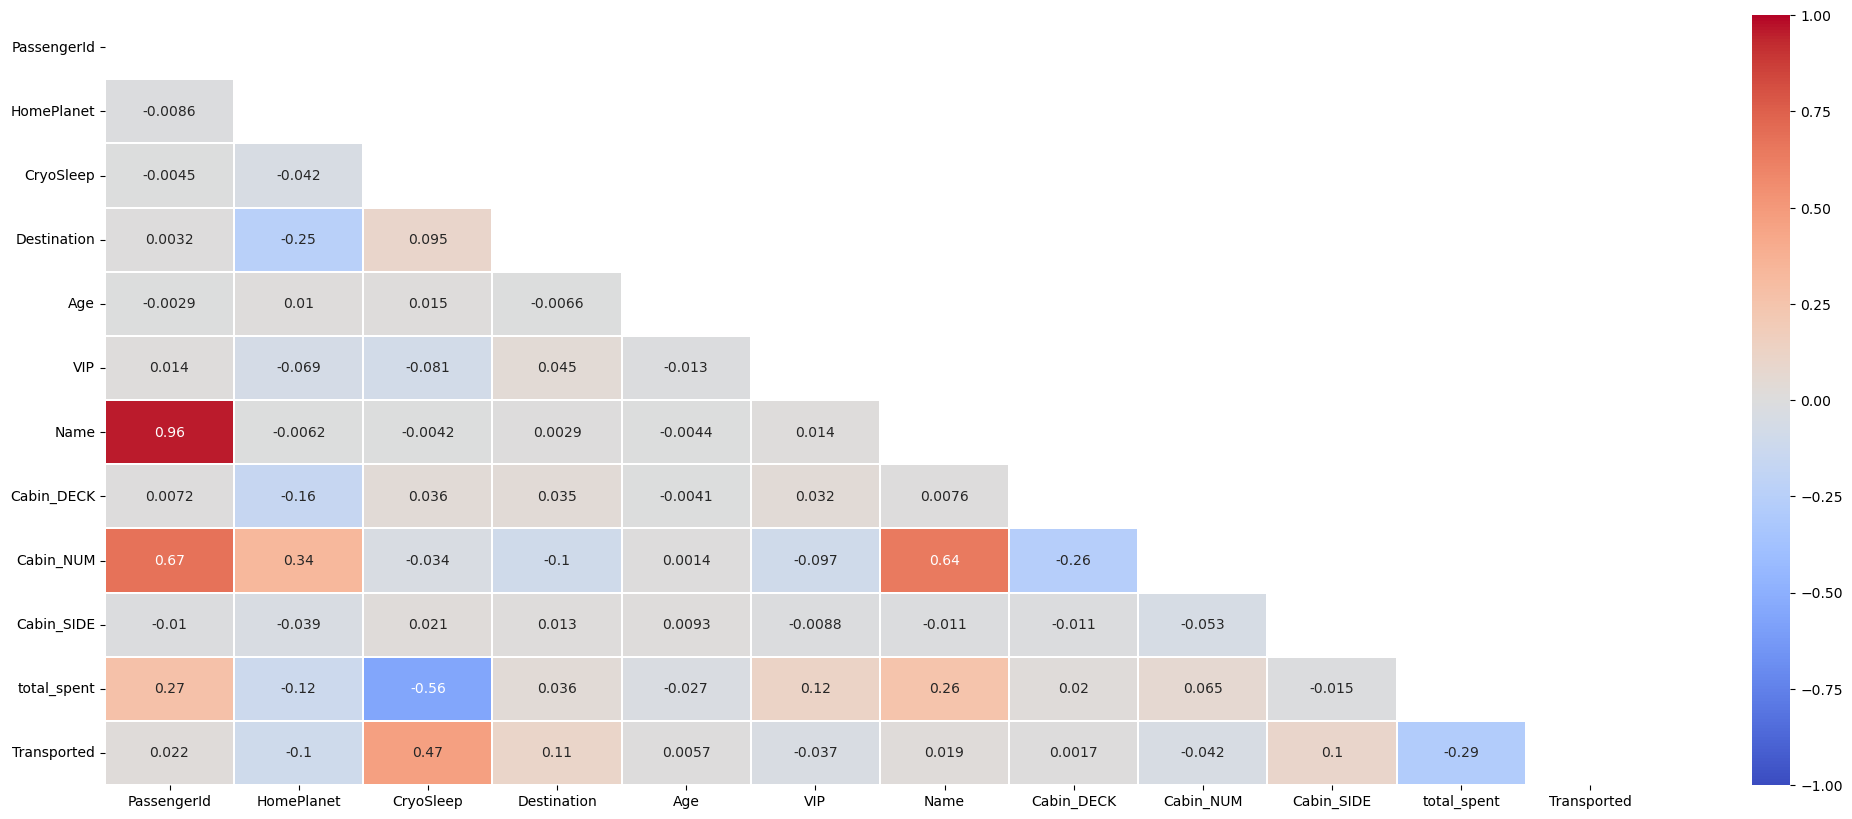

In [57]:
#correlation heatmap
#Initializes a new figure with an identifier of 5 and sets its size to 25x10 inches. 
#This large size ensures that all elements in the heatmap are clearly visible.
plt.figure(5, figsize=(25, 10))

#Calculating the Correlation Matrix
corr = train.apply(lambda x: pd.factorize(x)[0]).corr()

#Creating a Mask for the Upper Triangle
#This mask is used to hide the upper triangle of the heatmap, as the correlation matrix is symmetric and the upper triangle is redundant.
mask = np.triu(np.ones_like(corr, dtype=bool))

#Plotting the Heatmap
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [58]:
#function is designed to analyze rare categories in a list of categorical columns of a DataFrame and their relationship with a target variable.
#cat_cols: list of categorical columns to be analysed
def rare_analyser(dataframe, target, cat_cols):
        #Print Column Name and Unique Category Count:
        print(col, ":", len(dataframe[cat_cols].value_counts()))
        #Create and Print a Summary DataFrame
        print(pd.DataFrame({"COUNT": dataframe[cat_cols].value_counts(),
                            "RATIO": dataframe[cat_cols].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(cat_cols)[target].mean()}), end="\n\n\n")

In [59]:
rare_analyser(train, "Transported", "Cabin_NUM")

VRDeck : 1818
           COUNT  RATIO  TARGET_MEAN
Cabin_NUM                           
9999         199    0.0          0.5
82            28    0.0          0.6
86            22    0.0          0.6
19            22    0.0          0.6
56            21    0.0          0.7
...          ...    ...          ...
1644           1    0.0          0.0
1515           1    0.0          1.0
1639           1    0.0          0.0
1277           1    0.0          1.0
1894           1    0.0          0.0

[1818 rows x 3 columns]




#### 3.1.5 Categorical column to target analysis according to target
examining how the categories within categorical variables are related to the target variable. This type of analysis is useful in understanding the distribution and impact of categorical variables on the target.

Category Counts and Ratios
            HomePlanet  Ratio
HomePlanet                   
Earth             4803   55.3
Europa            2131   24.5
Mars              1759   20.2
----------------------------------------------
Target Variable Counts by Category
            Transported
HomePlanet             
Earth              2054
Europa             1404
Mars                920
----------------------------------------------
Target Possibility
            Transported
HomePlanet             
Earth              42.8
Europa             65.9
Mars               52.3
----------------------------------------------


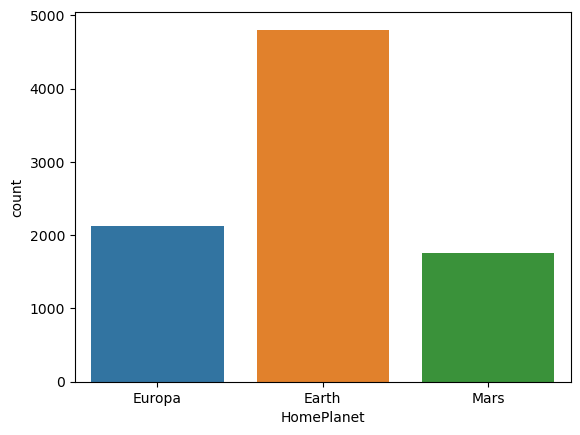

----------------------------------------------
Category Counts and Ratios
           CryoSleep  Ratio
CryoSleep                  
False           5558   63.9
True            3135   36.1
----------------------------------------------
Target Variable Counts by Category
           Transported
CryoSleep             
False             1824
True              2554
----------------------------------------------
Target Possibility
           Transported
CryoSleep             
False             32.8
True              81.5
----------------------------------------------


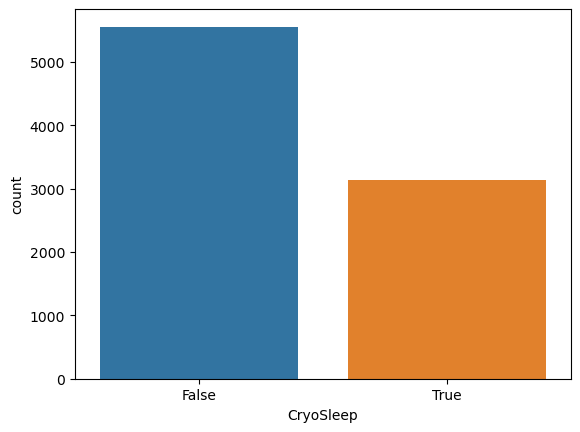

----------------------------------------------
Category Counts and Ratios
               Destination  Ratio
Destination                      
TRAPPIST-1e           6097   70.1
55 Cancri e           1800   20.7
PSO J318.5-22          796    9.2
----------------------------------------------
Target Variable Counts by Category
               Transported
Destination               
55 Cancri e           1098
PSO J318.5-22          401
TRAPPIST-1e           2879
----------------------------------------------
Target Possibility
               Transported
Destination               
55 Cancri e           61.0
PSO J318.5-22         50.4
TRAPPIST-1e           47.2
----------------------------------------------


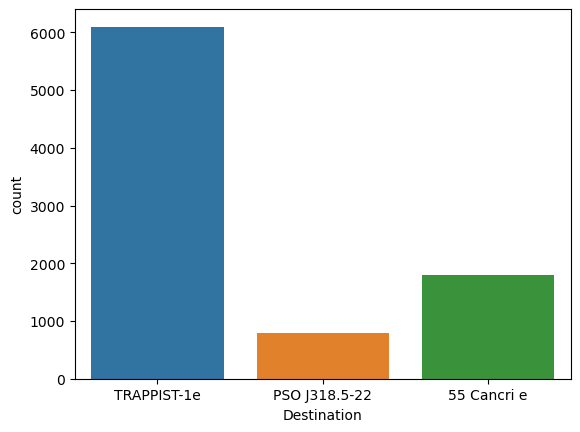

----------------------------------------------
Category Counts and Ratios
        VIP  Ratio
VIP               
False  8494   97.7
True    199    2.3
----------------------------------------------
Target Variable Counts by Category
       Transported
VIP               
False         4302
True            76
----------------------------------------------
Target Possibility
       Transported
VIP               
False         50.6
True          38.2
----------------------------------------------


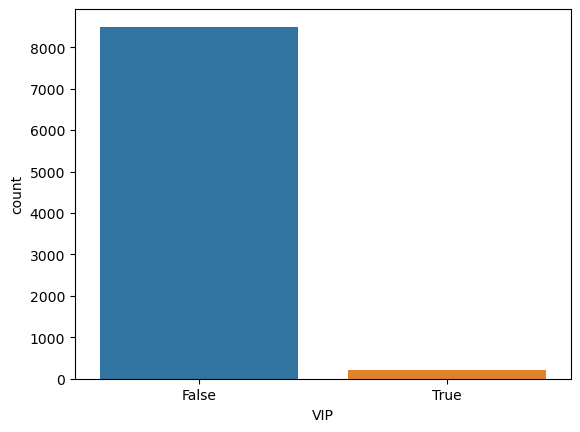

----------------------------------------------
Category Counts and Ratios
             Transported  Ratio
Transported                    
True                4378   50.4
False               4315   49.6
----------------------------------------------
Target Variable Counts by Category
             Transported
Transported             
False                  0
True                4378
----------------------------------------------
Target Possibility
             Transported
Transported             
False                0.0
True               100.0
----------------------------------------------


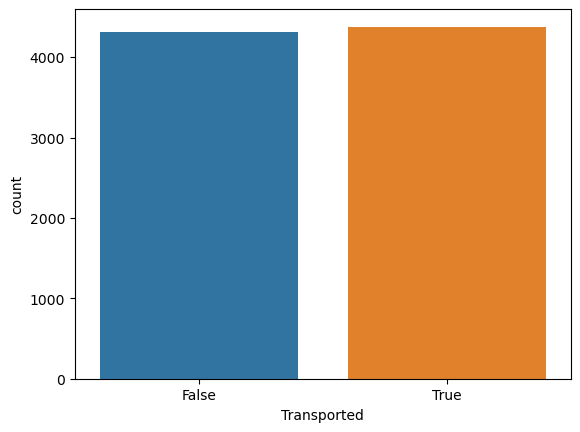

----------------------------------------------


In [60]:
for col in cat_cols:
    cat_summary(train,"Transported", col, plot= True)

## 4.Feature Engineering
Feature engineering is the pre-processing step of machine learning, which extracts features from raw data that are useful

In [61]:
#percentiles Parameter: A list of percentiles to include in the output. By default, describe includes the 25th, 50th, and 75th percentiles, but you can specify additional ones.
train["total_spent"].describe([0.01, 0.10, 0.15,0.20,0.25,0.35,0.40,0.45,0.50,0.60,0.70,0.80,0.90]).T

count    8693.0
mean     1424.5
std      2696.3
min         0.0
1%          0.0
10%         0.0
15%         0.0
20%         0.0
25%         0.0
35%         0.0
40%         0.0
45%       629.0
50%       716.0
60%       842.2
70%      1143.4
80%      1873.6
90%      3838.4
max     27842.0
Name: total_spent, dtype: float64

In [62]:
#converting 'Cabin_NUM' column to integer both in train and test dataset
train["Cabin_NUM"] = train["Cabin_NUM"].astype("int")
test["Cabin_NUM"] = test["Cabin_NUM"].astype("int")

In [63]:
train["Cabin_NUM"].describe([0.80, 0.90, 0.95, 0.96,0.97,0.98, 0.99]).T

count   8693.0
mean     815.5
std     1494.0
min        0.0
50%      448.0
80%     1176.6
90%     1460.0
95%     1700.4
96%     1753.0
97%     1816.2
98%     9999.0
99%     9999.0
max     9999.0
Name: Cabin_NUM, dtype: float64

In [64]:
#CABIN NUM CATEGORY
#categorizing values in ranges in the column 'Cabin_NUM'
train.loc[(train['Cabin_NUM'] <= 173 ) , "Cabin_NUM_CAT"] = 'CABIN_NUM_CAT_0_173'
train.loc[(train['Cabin_NUM'] > 173 ) & (train['Cabin_NUM'] <= 448) , "Cabin_NUM_CAT"]  = 'CABIN_NUM_CAT_173_448'
train.loc[(train['Cabin_NUM'] > 448 ) & (train['Cabin_NUM'] <= 700) , "Cabin_NUM_CAT"]  = 'CABIN_NUM_CAT_448_700'
train.loc[(train['Cabin_NUM'] > 700 ) & (train['Cabin_NUM'] <= 990) , "Cabin_NUM_CAT"]  = 'CABIN_NUM_CAT_700_990'
train.loc[(train['Cabin_NUM'] > 990 ) & (train['Cabin_NUM'] <= 1400) , "Cabin_NUM_CAT"] = 'CABIN_NUM_CAT_990_1400'
train.loc[(train['Cabin_NUM'] > 1400) & (train['Cabin_NUM'] <= 1818) , "Cabin_NUM_CAT"] = 'CABIN_NUM_CAT_1400_1818'
train.loc[(train['Cabin_NUM'] > 1818) , "Cabin_NUM_CAT"] = 'CABIN_NUM_CAT_NaN'

test.loc[(test['Cabin_NUM'] <= 173 ), "Cabin_NUM_CAT"] = 'CABIN_NUM_CAT_0_173'
test.loc[(test['Cabin_NUM'] > 173 ) & (test['Cabin_NUM'] <= 448), "Cabin_NUM_CAT"] = 'CABIN_NUM_CAT_173_448'
test.loc[(test['Cabin_NUM'] > 448 ) & (test['Cabin_NUM'] <= 700), "Cabin_NUM_CAT"] = 'CABIN_NUM_CAT_448_700'
test.loc[(test['Cabin_NUM'] > 700 ) & (test['Cabin_NUM'] <= 990), "Cabin_NUM_CAT"] = 'CABIN_NUM_CAT_700_990'
test.loc[(test['Cabin_NUM'] > 990 ) & (test['Cabin_NUM'] <= 1400), "Cabin_NUM_CAT"] = 'CABIN_NUM_CAT_990_1400'
test.loc[(test['Cabin_NUM'] > 1400) & (test['Cabin_NUM'] <= 1818), "Cabin_NUM_CAT"] = 'CABIN_NUM_CAT_1400_1818'
test.loc[(test['Cabin_NUM'] > 1818), "Cabin_NUM_CAT"] = 'CABIN_NUM_CAT_NaN'

In [65]:
train[['Cabin_NUM', 'Cabin_NUM_CAT']].head()

Cabin_NUM        Cabin_NUM_CAT
0          0  CABIN_NUM_CAT_0_173
1          0  CABIN_NUM_CAT_0_173
2          0  CABIN_NUM_CAT_0_173
3          0  CABIN_NUM_CAT_0_173
4          1  CABIN_NUM_CAT_0_173

In [66]:
test[['Cabin_NUM', 'Cabin_NUM_CAT']].head()

Cabin_NUM        Cabin_NUM_CAT
0          3  CABIN_NUM_CAT_0_173
1          4  CABIN_NUM_CAT_0_173
2          0  CABIN_NUM_CAT_0_173
3          1  CABIN_NUM_CAT_0_173
4          5  CABIN_NUM_CAT_0_173

In [67]:
#combining cryosleep column and cabin side column to create a new(additional) column
#Condition: Select rows where CryoSleep is True and Cabin_SIDE is "S".
#Action: Assign the value 'SLEEP_S' to the Cryo_Sleep_Side column for these rows.
train.loc[(train['CryoSleep'] == True)  & (train['Cabin_SIDE'] == "S"), "Cryo_Sleep_Side"] = 'SLEEP_S'
train.loc[(train['CryoSleep'] == True)  & (train['Cabin_SIDE'] == "P"), "Cryo_Sleep_Side"] = 'SLEEP_P'
train.loc[(train['CryoSleep'] == False) & (train['Cabin_SIDE'] == "S"), "Cryo_Sleep_Side"] = 'NO_SLEEP_S'
train.loc[(train['CryoSleep'] == False) & (train['Cabin_SIDE'] == "P"), "Cryo_Sleep_Side"] = 'NO_SLEEP_P'

In [68]:
test.loc[(test['CryoSleep'] == True)  & (test['Cabin_SIDE'] == "S"), "Cryo_Sleep_Side"] = 'SLEEP_S'
test.loc[(test['CryoSleep'] == True)  & (test['Cabin_SIDE'] == "P"), "Cryo_Sleep_Side"] = 'SLEEP_P'
test.loc[(test['CryoSleep'] == False) & (test['Cabin_SIDE'] == "S"), "Cryo_Sleep_Side"] = 'NO_SLEEP_S'
test.loc[(test['CryoSleep'] == False) & (test['Cabin_SIDE'] == "P"), "Cryo_Sleep_Side"] = 'NO_SLEEP_P'

In [69]:
# Feature from CryoSleep and Destination (train)
train.loc[(train['CryoSleep'] == True)  & (train['Destination'] == "TRAPPIST-1e"), "Cryo_Sleep_Destination"]   = 'SLEEP_TRAPPIST-1e'
train.loc[(train['CryoSleep'] == True)  & (train['Destination'] == "55 Cancri e"), "Cryo_Sleep_Destination"]   = 'SLEEP_55_Cancri_e'
train.loc[(train['CryoSleep'] == True)  & (train['Destination'] == "PSO J318.5-22"), "Cryo_Sleep_Destination"] = 'SLEEP_PSO_J318.5-22'
train.loc[(train['CryoSleep'] == False) & (train['Destination'] == "PSO J318.5-22"), "Cryo_Sleep_Destination"] = 'NO_SLEEP_PSO_J318.5-22'
train.loc[(train['CryoSleep'] == False) & (train['Destination'] == "55 Cancri e"), "Cryo_Sleep_Destination"]   = 'NO_SLEEP_55_Cancri_e'
train.loc[(train['CryoSleep'] == False) & (train['Destination'] == "TRAPPIST-1e"), "Cryo_Sleep_Destination"]   = 'NO_SLEEP_TRAPPIST-1e'

In [70]:
# Feature from CryoSleep and Destination (test)
test.loc[(test['CryoSleep'] == True)  & (test['Destination'] == "TRAPPIST-1e"), "Cryo_Sleep_Destination"] = 'SLEEP_TRAPPIST-1e'
test.loc[(test['CryoSleep'] == True)  & (test['Destination'] == "55 Cancri e"), "Cryo_Sleep_Destination"] = 'SLEEP_55_Cancri_e'
test.loc[(test['CryoSleep'] == True)  & (test['Destination'] == "PSO J318.5-22"), "Cryo_Sleep_Destination"] = 'SLEEP_PSO_J318.5-22'
test.loc[(test['CryoSleep'] == False) & (test['Destination'] == "PSO J318.5-22"), "Cryo_Sleep_Destination"] = 'NO_SLEEP_PSO_J318.5-22'
test.loc[(test['CryoSleep'] == False) & (test['Destination'] == "55 Cancri e"), "Cryo_Sleep_Destination"] = 'NO_SLEEP_55_Cancri_e'
test.loc[(test['CryoSleep'] == False) & (test['Destination'] == "TRAPPIST-1e"), "Cryo_Sleep_Destination"] = 'NO_SLEEP_TRAPPIST-1e'

In [71]:
# Feature from CryoSleep and Age (train)
train.loc[(train['CryoSleep'] == True)  & (train['Age'] <= 5), "Cryo_Sleep_Age"] = 'SlEEP_0_5'
train.loc[(train['CryoSleep'] == True)  & (train['Age'] > 5)   & (train['Age']  <= 19), "Cryo_Sleep_Age"] = 'SlEEP_6_18'
train.loc[(train['CryoSleep'] == True)  & (train['Age'] > 18)  & (train['Age']  <= 40), "Cryo_Sleep_Age"] = 'SLEEP_19_40'
train.loc[(train['CryoSleep'] == True)  & (train['Age'] > 40 ) & (train['Age']  <= 60), "Cryo_Sleep_Age"] = 'SLEEP_41_60'
train.loc[(train['CryoSleep'] == True)  & (train['Age'] > 60 ) & (train['Age']  <= 79), "Cryo_Sleep_Age"] = 'SLEEP_61_79'
train.loc[(train['CryoSleep'] == False) & (train['Age'] <= 5), "Cryo_Sleep_Age"] = 'NO_SlEEP_0_5'
train.loc[(train['CryoSleep'] == False) & (train['Age'] > 5)   & (train['Age']  <= 19), "Cryo_Sleep_Age"] = 'NO_SlEEP_6_18'
train.loc[(train['CryoSleep'] == False) & (train['Age'] > 18)  & (train['Age']  <= 40), "Cryo_Sleep_Age"] = 'NO_SLEEP_19_40'
train.loc[(train['CryoSleep'] == False) & (train['Age'] > 40 ) & (train['Age']  <= 60), "Cryo_Sleep_Age"] = 'NO_SLEEP_41_60'
train.loc[(train['CryoSleep'] == False) & (train['Age'] > 60 ) & (train['Age']  <= 79), "Cryo_Sleep_Age"] = 'NO_SLEEP_61_79'

In [72]:
# Feature from CryoSleep and Age (test)
test.loc[(test['CryoSleep'] == True)  & (test['Age'] <= 5), "Cryo_Sleep_Age"] = 'SlEEP_0_5'
test.loc[(test['CryoSleep'] == True)  & (test['Age'] > 5)   & (test['Age']  <= 19), "Cryo_Sleep_Age"] = 'SlEEP_6_18'
test.loc[(test['CryoSleep'] == True)  & (test['Age'] > 18)  & (test['Age']  <= 40), "Cryo_Sleep_Age"] = 'SLEEP_19_40'
test.loc[(test['CryoSleep'] == True)  & (test['Age'] > 40 ) & (test['Age']  <= 60), "Cryo_Sleep_Age"] = 'SLEEP_41_60'
test.loc[(test['CryoSleep'] == True)  & (test['Age'] > 60 ) & (test['Age']  <= 79), "Cryo_Sleep_Age"] = 'SLEEP_61_79'
test.loc[(test['CryoSleep'] == False) & (test['Age'] <= 5), "Cryo_Sleep_Age"]= 'NO_SlEEP_0_5'
test.loc[(test['CryoSleep'] == False) & (test['Age'] > 5)   & (test['Age']  <= 19), "Cryo_Sleep_Age"] = 'NO_SlEEP_6_18'
test.loc[(test['CryoSleep'] == False) & (test['Age'] > 18)  & (test['Age']  <= 40), "Cryo_Sleep_Age"] = 'NO_SLEEP_19_40'
test.loc[(test['CryoSleep'] == False) & (test['Age'] > 40 ) & (test['Age']  <= 60), "Cryo_Sleep_Age"] = 'NO_SLEEP_41_60'
test.loc[(test['CryoSleep'] == False) & (test['Age'] > 60 ) & (test['Age']  <= 79), "Cryo_Sleep_Age"] = 'NO_SLEEP_61_79'

In [73]:
#VIP and Total Spent Categorical Variable (train)
train.loc[(train['VIP'] == True) & (train['total_spent'] <= 687 ) , "VIP_TOTAL_SPENT"] = 'VIP_TOTAL_SPENT_0_687'
train.loc[(train['VIP'] == True) & (train['total_spent'] < 687 )  & (train['total_spent'] <= 758), "VIP_TOTAL_SPENT"]   = 'VIP_TOTAL_SPENT_687_758'
train.loc[(train['VIP'] == True) & (train['total_spent'] < 758 )  & (train['total_spent'] <= 899), "VIP_TOTAL_SPENT"]   = 'VIP_TOTAL_SPENT_758_899'
train.loc[(train['VIP'] == True) & (train['total_spent'] < 899 )  & (train['total_spent'] <= 1390), "VIP_TOTAL_SPENT"]  = 'VIP_TOTAL_SPENT_899_1390'
train.loc[(train['VIP'] == True) & (train['total_spent'] < 1390 ) & (train['total_spent'] <= 1737), "VIP_TOTAL_SPENT"]  = 'VIP_TOTAL_SPENT_1390_1737'
train.loc[(train['VIP'] == True) & (train['total_spent'] < 1737 ) & (train['total_spent'] <= 3577), "VIP_TOTAL_SPENT"]  = 'VIP_TOTAL_SPENT_1737_3577'
train.loc[(train['VIP'] == True) & (train['total_spent'] < 3577 ) & (train['total_spent'] <= 27842), "VIP_TOTAL_SPENT"] = 'VIP_TOTAL_SPENT_3577_27842'

train.loc[(train['VIP'] == False) & (train['total_spent'] <= 687 ) , "VIP_TOTAL_SPENT"]     = 'VIP_TOTAL_SPENT_0_687'
train.loc[(train['VIP'] == False) & (train['total_spent'] < 687 )  & (train['total_spent'] <= 758), "VIP_TOTAL_SPENT"]  = 'NO_VIP_TOTAL_SPENT_687_758'
train.loc[(train['VIP'] == False) & (train['total_spent'] < 758 )  & (train['total_spent'] <= 899), "VIP_TOTAL_SPENT"]  = 'NO_VIP_TOTAL_SPENT_758_899'
train.loc[(train['VIP'] == False) & (train['total_spent'] < 899 )  & (train['total_spent'] <= 1390), "VIP_TOTAL_SPENT"] = 'NO_VIP_TOTAL_SPENT_899_1390'
train.loc[(train['VIP'] == False) & (train['total_spent'] < 1390 ) & (train['total_spent'] <= 1737), "VIP_TOTAL_SPENT"] = 'NO_VIP_TOTAL_SPENT_1390_1737'
train.loc[(train['VIP'] == False) & (train['total_spent'] < 1737)  & (train['total_spent'] <= 3577), "VIP_TOTAL_SPENT"] = 'NO_VIP_TOTAL_SPENT_1737_3577'
train.loc[(train['VIP'] == False) & (train['total_spent'] < 3577)  & (train['total_spent'] <= 27842), "VIP_TOTAL_SPENT"]= 'NO_VIP_TOTAL_SPENT_3577_27842'

In [74]:
#VIP and Total Spent Categorical Variable (test)
test.loc[(test['VIP'] == True) & (test['total_spent'] <= 687 ) , "VIP_TOTAL_SPENT"] = 'VIP_TOTAL_SPENT_0_687'
test.loc[(test['VIP'] == True) & (test['total_spent'] < 687 )  & (test['total_spent'] <= 758), "VIP_TOTAL_SPENT"]   = 'VIP_TOTAL_SPENT_687_758'
test.loc[(test['VIP'] == True) & (test['total_spent'] < 758 )  & (test['total_spent'] <= 899), "VIP_TOTAL_SPENT"]   = 'VIP_TOTAL_SPENT_758_899'
test.loc[(test['VIP'] == True) & (test['total_spent'] < 899 )  & (test['total_spent'] <= 1390), "VIP_TOTAL_SPENT"]  = 'VIP_TOTAL_SPENT_899_1390'
test.loc[(test['VIP'] == True) & (test['total_spent'] < 1390 ) & (test['total_spent'] <= 1737), "VIP_TOTAL_SPENT"]  = 'VIP_TOTAL_SPENT_1390_1737'
test.loc[(test['VIP'] == True) & (test['total_spent'] < 1737 ) & (test['total_spent'] <= 3577), "VIP_TOTAL_SPENT"]  = 'VIP_TOTAL_SPENT_1737_3577'
test.loc[(test['VIP'] == True) & (test['total_spent'] < 3577 ) & (test['total_spent'] <= 27842), "VIP_TOTAL_SPENT"] = 'VIP_TOTAL_SPENT_3577_27842'

test.loc[(test['VIP'] == False) & (test['total_spent'] <= 687 ) , "VIP_TOTAL_SPENT"]    = 'VIP_TOTAL_SPENT_0_687'
test.loc[(test['VIP'] == False) & (test['total_spent'] < 687 )  & (test['total_spent'] <= 758), "VIP_TOTAL_SPENT"]  = 'NO_VIP_TOTAL_SPENT_687_758'
test.loc[(test['VIP'] == False) & (test['total_spent'] < 758 )  & (test['total_spent'] <= 899), "VIP_TOTAL_SPENT"]  = 'NO_VIP_TOTAL_SPENT_758_899'
test.loc[(test['VIP'] == False) & (test['total_spent'] < 899 )  & (test['total_spent'] <= 1390), "VIP_TOTAL_SPENT"] = 'NO_VIP_TOTAL_SPENT_899_1390'
test.loc[(test['VIP'] == False) & (test['total_spent'] < 1390 ) & (test['total_spent'] <= 1737), "VIP_TOTAL_SPENT"] = 'NO_VIP_TOTAL_SPENT_1390_1737'
test.loc[(test['VIP'] == False) & (test['total_spent'] < 1737)  & (test['total_spent'] <= 3577), "VIP_TOTAL_SPENT"] = 'NO_VIP_TOTAL_SPENT_1737_3577'
test.loc[(test['VIP'] == False) & (test['total_spent'] < 3577)  & (test['total_spent'] <= 27842), "VIP_TOTAL_SPENT"]= 'NO_VIP_TOTAL_SPENT_3577_27842'

In [75]:
#creating two new columns in the df_train DataFrame by splitting the PassengerId column. 
#The PassengerId column appears to contain values in the format group_passenger_within_group_people, which indicates a group identifier and a within-group identifier. 
#splitting passenger ID at _
#expand=True: This argument ensures that the split operation returns a DataFrame with separate columns for each part of the split strings.
train[["group_passenger", 'within_group_people']] = train["PassengerId"].str.split('_', expand=True).astype('int')

#converting new columns to integer
train["group_passenger"] = train["group_passenger"].astype('int')
train["within_group_people"] = train["within_group_people"].astype('int')

#displaying first 5 rows
train.head()

PassengerId HomePlanet  CryoSleep  Destination  Age    VIP               Name Cabin_DECK  Cabin_NUM Cabin_SIDE  total_spent  Transported        Cabin_NUM_CAT Cryo_Sleep_Side Cryo_Sleep_Destination  Cryo_Sleep_Age                VIP_TOTAL_SPENT  group_passenger  within_group_people
0     0001_01     Europa      False  TRAPPIST-1e 39.0  False    Maham Ofracculy          B          0          P          0.0        False  CABIN_NUM_CAT_0_173      NO_SLEEP_P   NO_SLEEP_TRAPPIST-1e  NO_SLEEP_19_40  NO_VIP_TOTAL_SPENT_3577_27842                1                    1
1     0002_01      Earth      False  TRAPPIST-1e 24.0  False       Juanna Vines          F          0          S        736.0         True  CABIN_NUM_CAT_0_173      NO_SLEEP_S   NO_SLEEP_TRAPPIST-1e  NO_SLEEP_19_40  NO_VIP_TOTAL_SPENT_3577_27842                2                    1
2     0003_01     Europa      False  TRAPPIST-1e 58.0   True      Altark Susent          A          0          S      10383.0        False  CABIN_NUM_CAT_0_173      NO_SLEEP_S   NO_SLEEP_TRAPPIST-1e  NO_SLEEP_41_60                            NaN                3                    1
3     0003_02     Europa      False  TRAPPIST-1e 33.0  False       Solam Susent          A          0          S       5176.0        False  CABIN_NUM_CAT_0_173      NO_SLEEP_S   NO_SLEEP_TRAPPIST-1e  NO_SLEEP_19_40                            NaN                3                    2
4     0004_01      Earth      False  TRAPPIST-1e 16.0  False  Willy Santantines          F          1          S       1091.0         True  CABIN_NUM_CAT_0_173      NO_SLEEP_S   NO_SLEEP_TRAPPIST-1e   NO_SlEEP_6_18  NO_VIP_TOTAL_SPENT_3577_27842                4                    1

In [76]:
#creating two new columns in the df_train DataFrame by splitting the PassengerId column. 
#The PassengerId column appears to contain values in the format group_passenger_within_group_people, which indicates a group identifier and a within-group identifier. 
#splitting passenger ID at _
#expand=True: This argument ensures that the split operation returns a DataFrame with separate columns for each part of the split strings.
test[["group_passenger", 'within_group_people']] = test["PassengerId"].str.split('_', expand=True).astype('int')

#converting new columns to integer
test["group_passenger"] = test["group_passenger"].astype('int')
test["within_group_people"] = test["within_group_people"].astype('int')

#displaying first 5 rows
test.head()

PassengerId HomePlanet  CryoSleep  Destination  Age    VIP              Name Cabin_DECK  Cabin_NUM Cabin_SIDE  total_spent        Cabin_NUM_CAT Cryo_Sleep_Side Cryo_Sleep_Destination  Cryo_Sleep_Age                VIP_TOTAL_SPENT  group_passenger  within_group_people
0     0013_01      Earth       True  TRAPPIST-1e 27.0  False   Nelly Carsoning          G          3          S          0.0  CABIN_NUM_CAT_0_173         SLEEP_S      SLEEP_TRAPPIST-1e     SLEEP_19_40  NO_VIP_TOTAL_SPENT_3577_27842               13                    1
1     0018_01      Earth      False  TRAPPIST-1e 19.0  False    Lerome Peckers          F          4          S       2832.0  CABIN_NUM_CAT_0_173      NO_SLEEP_S   NO_SLEEP_TRAPPIST-1e  NO_SLEEP_19_40  NO_VIP_TOTAL_SPENT_3577_27842               18                    1
2     0019_01     Europa       True  55 Cancri e 31.0  False   Sabih Unhearfus          C          0          S          0.0  CABIN_NUM_CAT_0_173         SLEEP_S      SLEEP_55_Cancri_e     SLEEP_19_40  NO_VIP_TOTAL_SPENT_3577_27842               19                    1
3     0021_01     Europa      False  TRAPPIST-1e 38.0  False  Meratz Caltilter          C          1          S       7418.0  CABIN_NUM_CAT_0_173      NO_SLEEP_S   NO_SLEEP_TRAPPIST-1e  NO_SLEEP_19_40                            NaN               21                    1
4     0023_01      Earth      False  TRAPPIST-1e 20.0  False   Brence Harperez          F          5          S        645.0  CABIN_NUM_CAT_0_173      NO_SLEEP_S   NO_SLEEP_TRAPPIST-1e  NO_SLEEP_19_40  NO_VIP_TOTAL_SPENT_3577_27842               23                    1

In [77]:
# Solo passenger (creates a new column named solo)
train['Solo'] = (train['within_group_people'] == 1).astype(int)

# Family (creates a new column named family)
train['Family'] = (train['within_group_people'] > 1).astype(int)

# New feature distribution
train[['Solo', 'Family']].head()

Solo  Family
0     1       0
1     1       0
2     1       0
3     0       1
4     1       0

In [78]:
# Solo passenger (creates a new column named solo)
test['Solo'] = (test['within_group_people'] == 1).astype(int)

# Family (creates a new column named family)
test['Family'] = (test['within_group_people'] > 1).astype(int)

# New feature distribution
test[['Solo', 'Family']].head()

Solo  Family
0     1       0
1     1       0
2     1       0
3     1       0
4     1       0

In [79]:
#pd.cut = allows to segment and sort data values into bins or categories.
#new column age_cat
#labels=column name
train["AGE_CAT"] = pd.cut(train["Age"], [0, 5, 18, 40, 60, 79], labels=["0_5", "6_18", "19_40", "41_60", "61_79"])

In [80]:
#pd.cut = allows to segment and sort data values into bins or categories.
#new column age_cat
#labels=column name
test["AGE_CAT"] = pd.cut(test["Age"], [0, 5, 18, 40, 60, 79], labels=["0_5", "6_18", "19_40", "41_60", "61_79"])

### 4.1 Encoding
encoding refers to the process of converting categorical data into numerical ones

label encoding-converting categorical to numerical by assigning unique integer value to each element. is used when their is order or ranking(high low) in the categorical values

one hot encoding-used to convert categorical to numerical. converts into binary(0,1) . used when the categorical column has no order or ranking

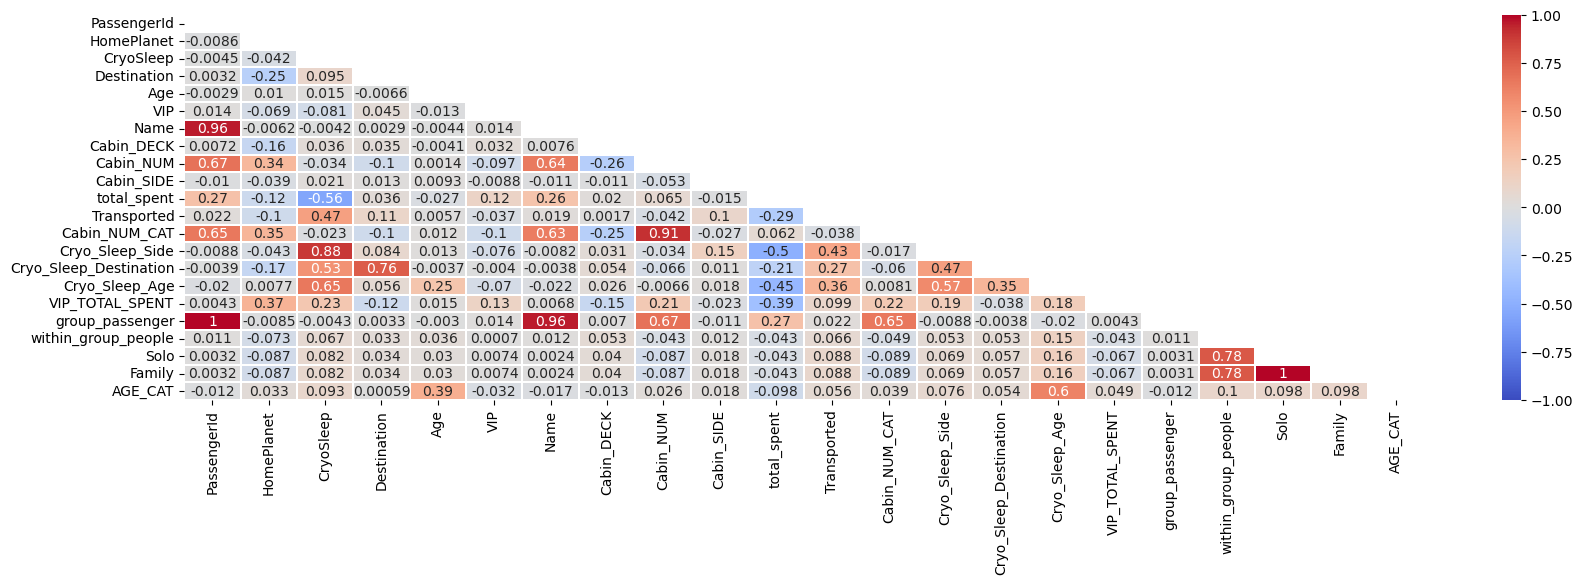

In [81]:
#Generating correlation heatmap
#defining plot size
plt.figure(5, figsize=(20, 5))

#applying lambda function for finding correlation
corr = train.apply(lambda x: pd.factorize(x)[0]).corr()

#masking upper triangle since its redundunt
mask = np.triu(np.ones_like(corr, dtype=bool))

#creating the heatmap
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [82]:
#identify binary columns(columns having binary values, dtypes != int,float)
#creates a lst of col_names with binary values
binary_cols = [col for col in train.columns if train[col].dtype not in [int, float] and train[col].nunique() == 2]
binary_cols

['CryoSleep', 'VIP', 'Cabin_SIDE', 'Transported', 'VIP_TOTAL_SPENT']

In [83]:
#identify binary columns(columns having binary values, dtypes != int,float)
#creates a lst of col_names with binary values
binary_cols1 = [col for col in test.columns if test[col].dtype not in [int, float] and test[col].nunique() == 2]
binary_cols1

['CryoSleep', 'VIP', 'Cabin_SIDE', 'VIP_TOTAL_SPENT']

In [84]:
#label encoding on binary categorical columns
#defining the function
def label_encoder(dataframe, binary_col):
    
    #creates an instance of LabelEncoder from the sklearn.preprocessing module. 
    labelencoder = LabelEncoder()
    
    #fit_transform is a method of LabelEncoder that fits the encoder to the unique values in the column and transforms them to numerical values.
    #dataframe[binary_col] accesses the specified binary column in the DataFrame and applies the transformation. 
    #The original values in the column are replaced with the encoded numerical values.
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [85]:
for col in binary_cols:
    train= label_encoder(train, col)

In [86]:
for col in binary_cols1:
    test = label_encoder(test, col)

In [87]:
#creating a list of col_names with categorical nunique values more than 2 and less than or equal to 25
ohe_cols = [col for col in train.columns if 25 >= train[col].nunique() > 2 ]

In [88]:
ohe_cols1 = [col for col in test.columns if 25 >= test[col].nunique() > 2 ]

In [89]:
#removing specific columns from list
ohe_cols = [col for col in ohe_cols if col not in ("CryoSleep", "VIP", "Cabin_SIDE", "Transported","CRYO_SLEEP_IN_GROUP")]

In [90]:
ohe_cols1 = [col for col in ohe_cols1 if col not in ("CryoSleep", "VIP", "Cabin_SIDE", "CRYO_SLEEP_IN_GROUP")]

In [91]:
ohe_cols1

['HomePlanet',
 'Destination',
 'Cabin_DECK',
 'Cabin_NUM_CAT',
 'Cryo_Sleep_Side',
 'Cryo_Sleep_Destination',
 'Cryo_Sleep_Age',
 'VIP_TOTAL_SPENT',
 'within_group_people',
 'AGE_CAT']

In [92]:
#function for one hot encoding
#categorical_cols=columns undergoing one hot encoding
#drop_first: A boolean parameter (default is True) that determines whether to drop the first level of the categorical variable to avoid multicollinearity.
#get dummies=used to one hot encode
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

train= one_hot_encoder(train, ohe_cols)
test= one_hot_encoder(test, ohe_cols1)

In [93]:
#categorizing columns according to categorical, numerical, cardinal
print('Train')
print('-------------------------')
cat_cols, num_cols, cat_but_car = categorize_columns(train, cat_th=5, car_th=20)
print('-------------------------')
print('Test')
print('-------------------------')
cat_cols1, num_cols1, cat_but_car1 = categorize_columns(test, cat_th=5, car_th=20)
print('-------------------------')

Train
-------------------------
observations: 8693
variables: 59
cat_cols: 53
num_cols: 4
cat_but_car: 2
num_but_cat: 53
-------------------------
Test
-------------------------
observations: 4277
variables: 58
cat_cols: 52
num_cols: 4
cat_but_car: 2
num_but_cat: 52
-------------------------


In [94]:
train.head()

PassengerId  CryoSleep  Age  VIP               Name  Cabin_NUM  Cabin_SIDE  total_spent  Transported  group_passenger  Solo  Family  HomePlanet_Europa  HomePlanet_Mars  Destination_PSO J318.5-22  Destination_TRAPPIST-1e  Cabin_DECK_B  Cabin_DECK_C  Cabin_DECK_D  Cabin_DECK_E  Cabin_DECK_F  Cabin_DECK_G  Cabin_DECK_T  Cabin_NUM_CAT_CABIN_NUM_CAT_1400_1818  Cabin_NUM_CAT_CABIN_NUM_CAT_173_448  ...  Cryo_Sleep_Destination_SLEEP_55_Cancri_e  Cryo_Sleep_Destination_SLEEP_PSO_J318.5-22  \
0     0001_01          0 39.0    0    Maham Ofracculy          0           0          0.0            0                1     1       0               True            False                      False                     True          True         False         False         False         False         False         False                                  False                                False  ...                                     False                                       False   
1     0002_01          0 24.0    0       Juanna Vines          0           1        736.0            1                2     1       0              False            False                      False                     True         False         False         False         False          True         False         False                                  False                                False  ...                                     False                                       False   
2     0003_01          0 58.0    1      Altark Susent          0           1      10383.0            0                3     1       0               True            False                      False                     True         False         False         False         False         False         False         False                                  False                                False  ...                                     False                                       False   
3     0003_02          0 33.0    0       Solam Susent          0           1       5176.0            0                3     0       1               True            False                      False                     True         False         False         False         False         False         False         False                                  False                                False  ...                                     False                                       False   
4     0004_01          0 16.0    0  Willy Santantines          1           1       1091.0            1                4     1       0              False            False                      False                     True         False         False         False         False          True         False         False                                  False                                False  ...                                     False                                       False   

   Cryo_Sleep_Destination_SLEEP_TRAPPIST-1e  Cryo_Sleep_Age_NO_SLEEP_41_60  Cryo_Sleep_Age_NO_SLEEP_61_79  Cryo_Sleep_Age_NO_SlEEP_0_5  Cryo_Sleep_Age_NO_SlEEP_6_18  Cryo_Sleep_Age_SLEEP_19_40  Cryo_Sleep_Age_SLEEP_41_60  Cryo_Sleep_Age_SLEEP_61_79  Cryo_Sleep_Age_SlEEP_0_5  Cryo_Sleep_Age_SlEEP_6_18  VIP_TOTAL_SPENT_1  VIP_TOTAL_SPENT_2  within_group_people_2  within_group_people_3  within_group_people_4  within_group_people_5  within_group_people_6  within_group_people_7  \
0                                     False                          False                          False                        False                         False                       False                       False                       False                     False                      False              False              False                  False                  False                  False                  False                  False                  False   
1                                     False                          False                         

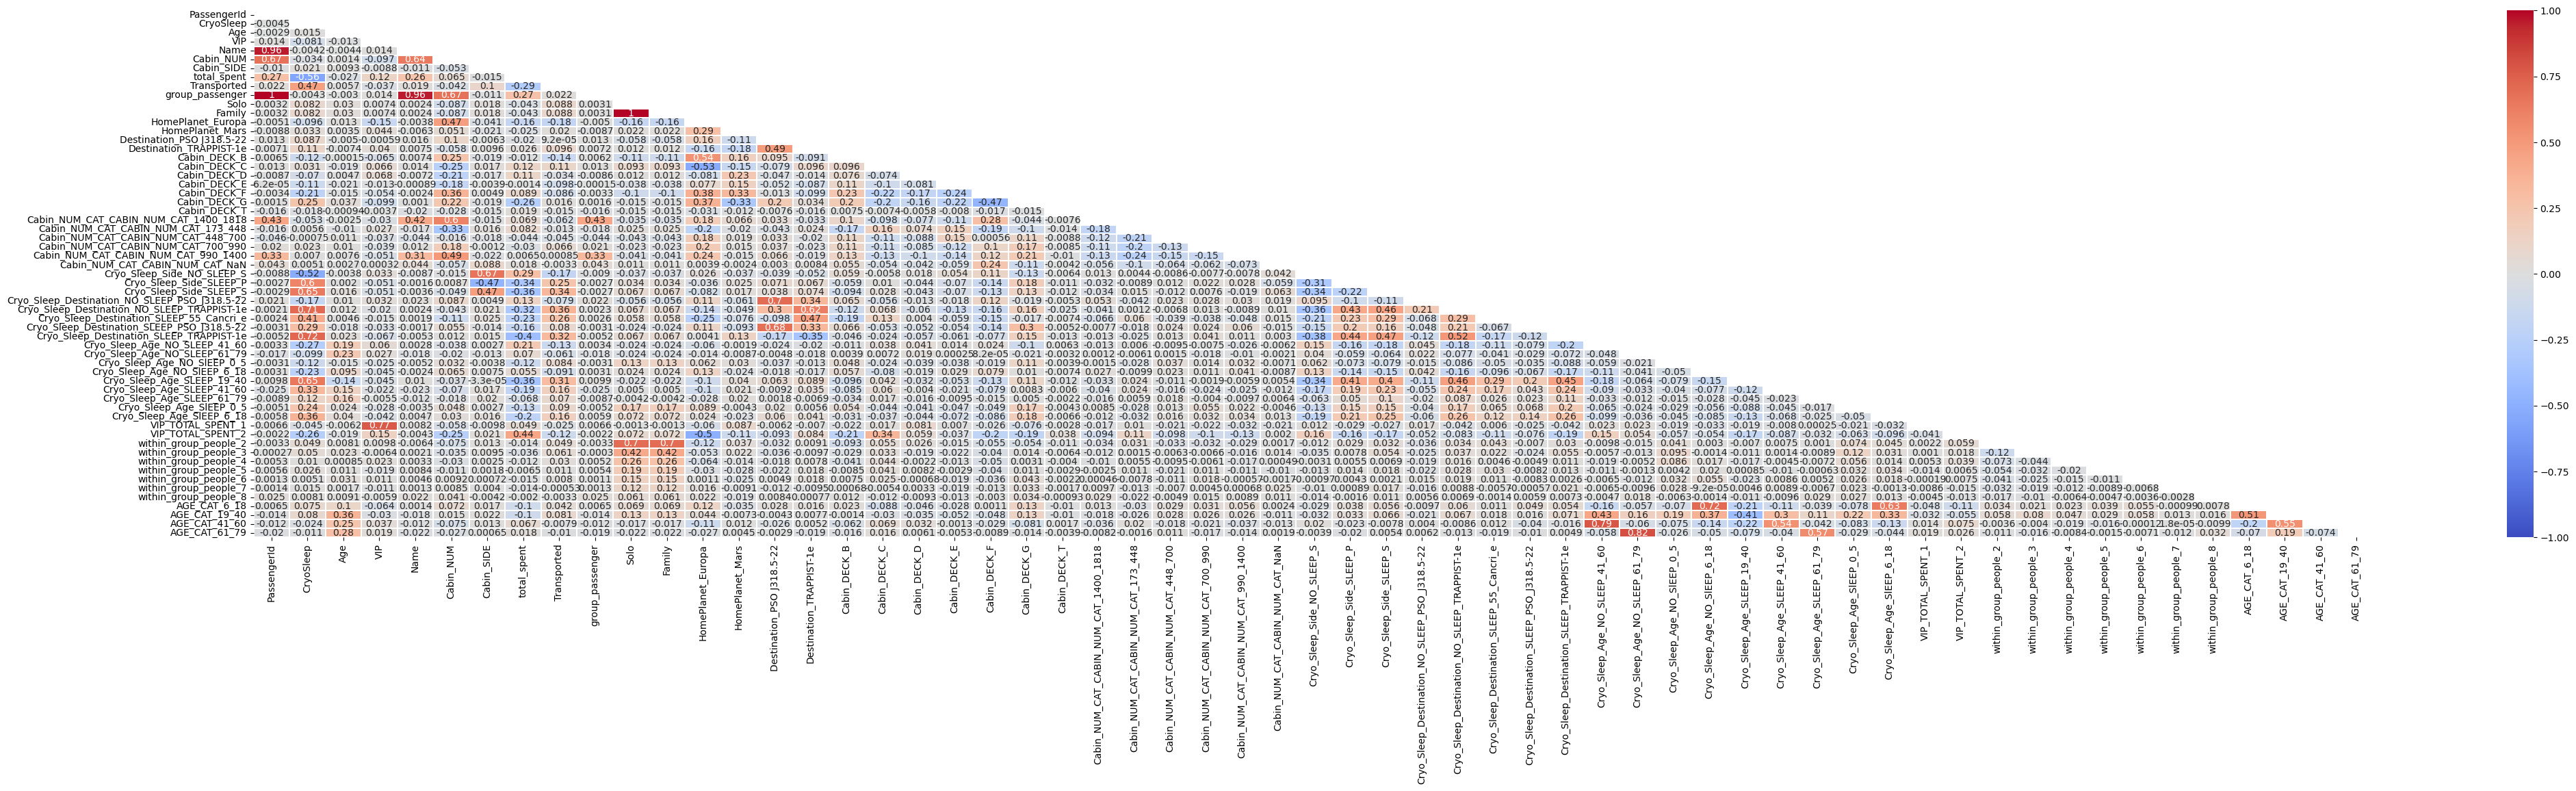

In [95]:
#heatmap creation
plt.figure(5, figsize=(50, 10))

#finding correlation
corr = train.apply(lambda x: pd.factorize(x)[0]).corr()

#masking upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#creating the heatmap
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

### 4.2 Discarding Unnecessary Columns

In [96]:
cat_but_car

['PassengerId', 'Name']

In [97]:
cat_but_car1

['PassengerId', 'Name']

In [98]:
#Dropping Columns
train= train.drop("PassengerId", axis=1)
train= train.drop("Name", axis=1)

In [99]:
train.head()

CryoSleep  Age  VIP  Cabin_NUM  Cabin_SIDE  total_spent  Transported  group_passenger  Solo  Family  HomePlanet_Europa  HomePlanet_Mars  Destination_PSO J318.5-22  Destination_TRAPPIST-1e  Cabin_DECK_B  Cabin_DECK_C  Cabin_DECK_D  Cabin_DECK_E  Cabin_DECK_F  Cabin_DECK_G  Cabin_DECK_T  Cabin_NUM_CAT_CABIN_NUM_CAT_1400_1818  Cabin_NUM_CAT_CABIN_NUM_CAT_173_448  Cabin_NUM_CAT_CABIN_NUM_CAT_448_700  Cabin_NUM_CAT_CABIN_NUM_CAT_700_990  ...  Cryo_Sleep_Destination_SLEEP_55_Cancri_e  \
0          0 39.0    0          0           0          0.0            0                1     1       0               True            False                      False                     True          True         False         False         False         False         False         False                                  False                                False                                False                                False  ...                                     False   
1          0 24.0    0          0           1        736.0            1                2     1       0              False            False                      False                     True         False         False         False         False          True         False         False                                  False                                False                                False                                False  ...                                     False   
2          0 58.0    1          0           1      10383.0            0                3     1       0               True            False                      False                     True         False         False         False         False         False         False         False                                  False                                False                                False                                False  ...                                     False   
3          0 33.0    0          0           1       5176.0            0                3     0       1               True            False                      False                     True         False         False         False         False         False         False         False                                  False                                False                                False                                False  ...                                     False   
4          0 16.0    0          1           1       1091.0            1                4     1       0              False            False                      False                     True         False         False         False         False          True         False         False                                  False                                False                                False                                False  ...                                     False   

   Cryo_Sleep_Destination_SLEEP_PSO_J318.5-22  Cryo_Sleep_Destination_SLEEP_TRAPPIST-1e  Cryo_Sleep_Age_NO_SLEEP_41_60  Cryo_Sleep_Age_NO_SLEEP_61_79  Cryo_Sleep_Age_NO_SlEEP_0_5  Cryo_Sleep_Age_NO_SlEEP_6_18  Cryo_Sleep_Age_SLEEP_19_40  Cryo_Sleep_Age_SLEEP_41_60  Cryo_Sleep_Age_SLEEP_61_79  Cryo_Sleep_Age_SlEEP_0_5  Cryo_Sleep_Age_SlEEP_6_18  VIP_TOTAL_SPENT_1  VIP_TOTAL_SPENT_2  within_group_people_2  within_group_people_3  within_group_people_4  within_group_people_5  \
0                                       False                                     False                          False                          False                        False                         False                       False                       False                       False                     False                      False              False              False                  False                  False                  False                  False   
1                                       False                                     False                       

In [100]:
P_ID = test["PassengerId"]

In [101]:
test= test.drop("PassengerId", axis=1)
test= test.drop("Name", axis=1)

### 4.3 Scaling for Normalization
Scaling guarantees that all features are on a comparable scale and have comparable ranges. This process is known as feature normalisation. 

Scaling is the process of transforming variables so that they have a similar scale and range. Scaling is important in data pre-processing and modeling because many machine learning algorithms are sensitive to the scale of the input variables. Scaling can be used to normalize variables so that they have a similar scale and range, which can improve the performance and stability of the algorithms. 

In [102]:
#RobustScaler: Scales features using statistics that are robust to outliers.
#Fit on Training Data: Computes the necessary statistics (median and interquartile range) from the training data.
#Transform Test Data: Uses the computed statistics from the training data to scale the test data.
# Fit and transform the training data
rs = RobustScaler()
train[num_cols] = pd.DataFrame(rs.fit_transform(train[num_cols]), columns = train[num_cols].columns)

# Transform the test data using the same scaler
test[num_cols1] = pd.DataFrame(rs.transform(test[num_cols1]), columns = test[num_cols1].columns)

In [103]:
train["Transported"].value_counts()

Transported
1    4378
0    4315
Name: count, dtype: int64

## 5. Modelling
A machine learning model is a program that can find patterns or make decisions from a previously unseen dataset.

In [104]:
#Lazy Predict is a Python library that provides a simple and efficient way to make predictions. 
#It can help you pre-process your data, tune your models, and evaluate your results in a more convenient way. 
#Additionally, it offers features such as model selection and hyperparameter optimization that can help you get the most out of your machine-learning models.
#lazypredict is a Python library designed to provide a quick way to build and evaluate machine learning models. 
#It offers an easy way to run and compare multiple models with minimal coding.
!pip install lazypredict

In [105]:
#LazyClassifier: This class is used to quickly build and evaluate multiple classification models.
#LazyRegressor: This class is used to quickly build and evaluate multiple regression models.
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [106]:
X=train.drop(["Transported"], axis=1)

In [107]:
X

CryoSleep   Age  VIP  Cabin_NUM  Cabin_SIDE  total_spent  group_passenger  Solo  Family  HomePlanet_Europa  HomePlanet_Mars  Destination_PSO J318.5-22  Destination_TRAPPIST-1e  Cabin_DECK_B  Cabin_DECK_C  Cabin_DECK_D  Cabin_DECK_E  Cabin_DECK_F  Cabin_DECK_G  Cabin_DECK_T  Cabin_NUM_CAT_CABIN_NUM_CAT_1400_1818  Cabin_NUM_CAT_CABIN_NUM_CAT_173_448  Cabin_NUM_CAT_CABIN_NUM_CAT_448_700  Cabin_NUM_CAT_CABIN_NUM_CAT_700_990  Cabin_NUM_CAT_CABIN_NUM_CAT_990_1400  ...  \
0             0  0.71    0      -0.52           0        -0.50            -1.01     1       0               True            False                      False                     True          True         False         False         False         False         False         False                                  False                                False                                False                                False                                 False  ...   
1             0 -0.18    0      -0.52           1         0.01            -1.01     1       0              False            False                      False                     True         False         False         False         False          True         False         False                                  False                                False                                False                                False                                 False  ...   
2             0  1.82    1      -0.52           1         6.71            -1.01     1       0               True            False                      False                     True         False         False         False         False         False         False         False                                  False                                False                                False                                False                                 False  ...   
3             0  0.35    0      -0.52           1         3.10            -1.01     0       1               True            False                      False                     True         False         False         False         False         False         False         False                                  False                                False                                False                                False                                 False  ...   
4             0 -0.65    0      -0.52           1         0.26            -1.01     1       0              False            False                      False                     True         False         False         False         False          True         False         False                                  False                                False                                False                                False                                 False  ...   
...         ...   ...  ...        ...         ...          ...              ...   ...     ...                ...              ...                        ...                      ...           ...           ...           ...           ...           ...           ...           ...                                    ...                                  ...                                  ...                                  ...                                   ...  ...   
8688          0  0.82    1      -0.40           0         5.43             1.02     1       0               True            False                      False                    False         False         False         False         False         False         False         False                                  False                                False                                False                                False                                 False  ...   
8689          1 -0.53    0       1.21           1        -0.50             1.02     1       0              False            False                       True                    False         False   

In [108]:
y= train["Transported"]

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [110]:
#Running the LazyClassifier should give you a DataFrame with various performance metrics for multiple classification models.
#The output models will be a DataFrame containing the performance metrics for each classifier. Each row corresponds to a different model, and the columns represent various evaluation metrics. Here are some of the common metrics you might find:
#Model: The name of the classification model.
#Accuracy: The proportion of correctly classified instances.
#Balanced Accuracy: The average of recall obtained on each class.
#ROC AUC: Area Under the Receiver Operating Characteristic Curve.
#F1 Score: The harmonic mean of precision and recall.
#Time Taken: The time taken to train and test the model.
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:24<00:00,  1.19it/s]

[LightGBM] [Info] Number of positive: 3074, number of negative: 3011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 860
[LightGBM] [Info] Number of data points in the train set: 6085, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505177 -> initscore=0.020707
[LightGBM] [Info] Start training from score 0.020707


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  Time Taken
Model                                                                                    
LGBMClassifier                     0.74               0.74     0.74      0.74        0.60
SVC                                0.74               0.74     0.74      0.73        3.97
AdaBoostClassifier                 0.73               0.73     0.73      0.73        0.75
QuadraticDiscriminantAnalysis      0.73               0.73     0.73      0.72        0.04
NuSVC                              0.73               0.73     0.73      0.72        6.68
LogisticRegression                 0.72               0.72     0.72      0.72        0.08
CalibratedClassifierCV             0.72               0.72     0.72      0.72        0.19
LinearDiscriminantAnalysis         0.72               0.72     0.72      0.72        0.34
SGDClassifier                      0.72               0.72     0.72      0.72        0.07
RidgeClassifierCV                  0.72               0.72     0.72      0.72        0.03
RidgeClassifier                    0.72               0.72     0.72      0.72        0.19
NearestCentroid                    0.72               0.72     0.72      0.72        0.02
LinearSVC                          0.72               0.72     0.72      0.72        0.54
XGBClassifier                      0.72               0.72     0.72      0.72        0.39
BernoulliNB                        0.72               0.72     0.72      0.72        0.08
RandomForestClassifier             0.72               0.72     0.72      0.72        2.70
BaggingClassifier                  0.72               0.72     0.72      0.71        0.64
LabelSpreading                     0.71               0.71     0.71      0.71        2.76
KNeighborsClassifier               0.71               0.71     0.71      0.71        0.30
ExtraTreesClassifier               0.71               0.71     0.71      0.71        1.31
LabelPropagation                   0.71               0.71     0.71      0.71        2.25
GaussianNB                         0.70               0.70     0.70      0.70        0.03
DecisionTreeClassifier             0.65               0.65     0.65      0.65        0.10
ExtraTreeClassifier                0.63               0.63     0.63      0.63        0.03
Perceptron                         0.52               0.52     0.52      0.51        0.02
DummyClassifier                    0.50               0.50     0.50      0.33        0.02
PassiveAggressiveClassifier        0.49               0.49     0.49      0.49        0.07

In [111]:
import lightgbm as lgb
#initialized a LightGBM classifier using the LGBMClassifier class. 
clf = lgb.LGBMClassifier()

In [112]:
# predict the results
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3074, number of negative: 3011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 6085, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505177 -> initscore=0.020707
[LightGBM] [Info] Start training from score 0.020707


In [113]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.7512


#### Cross Validation
Cross validation is a technique used in machine learning to evaluate the performance of a model on unseen data. It involves dividing the available data into multiple folds or subsets, using one of these folds as a validation set, and training the model on the remaining folds. This process is repeated multiple times, each time using a different fold as the validation set. Finally, the results from each validation step are averaged to produce a more robust estimate of the model’s performance. Cross validation is an important step in the machine learning process and helps to ensure that the model selected for deployment is robust and generalizes well to new data.

The main purpose of cross validation is to prevent overfitting

In [114]:
#cv_results_1=A dictionary that stores the results of the cross-validation.
#lgbm_model: The model to be evaluated.
# X: The feature matrix (independent variables).
#y: The target vector (dependent variable).
#cv=5: Specifies 5-fold cross-validation.
#This means the dataset is split into 5 parts, and the model is trained and evaluated 5 times, each time using a different part as the test set and the remaining parts as the training set.
#scoring: A list of metrics to evaluate. 
#"accuracy": The proportion of correct predictions among the total number of cases processed.
#"precision": The proportion of positive identifications that were actually correct.
#"recall": The proportion of actual positives that were correctly identified.
#f1": The harmonic mean of precision and recall, providing a balance between the two.
#"roc_auc": The area under the receiver operating characteristic curve, which measures the model's ability to distinguish between classes.
cv_results_l = cross_validate(clf, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])
#cv_results_l["test_accuracy"]: An array containing the accuracy scores for each fold.
#.mean(): Calculates the mean accuracy score across all folds.
print (f'Accuracy - : {cv_results_l["test_accuracy"].mean()}')

print (f'Precision - : {cv_results_l["test_precision"].mean()}')
print (f'Recall - : {cv_results_l["test_recall"].mean()}')
print (f'F1 - : {cv_results_l["test_f1"].mean()}')
print (f'roc_auc_score - : {cv_results_l["test_roc_auc"].mean()}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

## Hyperparameter Tuning

The dictionary lgbm_params contains hyperparameters for a LightGBM model that we might want to tune. Each key in the dictionary corresponds to a specific hyperparameter of the LightGBM model, and the values are lists of potential values for those hyperparameters
#### learning_rate:
Definition: This parameter controls the size of the steps the model takes to reach a minimum in the loss function. It is a crucial hyperparameter that impacts how quickly the model converges.
Values: [0.01, 0.02, 0.05, 0.1]
0.01: A very small step size, which means the model will learn slowly and may require more iterations but can lead to a more stable and potentially better model.
0.02, 0.05: Moderate step sizes, often good starting points for learning rates.
0.1: A larger step size, which means the model will learn faster but may risk overshooting minima and causing instability.

#### n_estimators:
Definition: This parameter specifies the number of boosting rounds or trees in the model. More trees can improve model accuracy but also increase training time.
Values: [200, 300, 350, 400]
200: Fewer trees, leading to faster training but potentially less accuracy.
300, 350: Intermediate values offering a balance between training time and accuracy.
400: More trees, which may increase accuracy but also requires more computational resources and time.

#### colsample_bytree:
Definition: This parameter specifies the fraction of features (columns) to be randomly sampled for each tree. This can help prevent overfitting by ensuring that the model does not rely too heavily on any particular feature.
Values: [0.9, 0.8, 1]
0.9: Use 90% of the features for each tree, adding some randomness and diversity.
0.8: Use 80% of the features, adding more randomness.
1: Use all features for each tree, which means no subsampling of features.

#### Purpose of the Dictionary
The dictionary lgbm_params is typically used in hyperparameter tuning processes, such as grid search or random search, where different combinations of the specified values are tested to find the best set of hyperparameters for the model. This helps in improving the model's performance by finding the optimal settings for these parameters.

In [115]:
lgbm_params = {"learning_rate": [0.01, 0.02, 0.05, 0.1],
               "n_estimators": [200, 300, 350, 400],
               "colsample_bytree": [0.9, 0.8, 1]}

In [117]:
#GridSearchCV is a function from scikit-learn that performs an exhaustive search over specified parameter values for an estimator. It helps in finding the best hyperparameters for the model by testing all possible combinations of the provided parameter grid.
#clf:This is the estimator (model) for which we are tuning the hyperparameters. In this case, it is an instance of LGBMClassifier.
#lgbm_params: This is the dictionary containing the hyperparameters to be tested.
#cv=10: This specifies the number of cross-validation folds to be used. Here, 10-fold cross-validation is used, meaning the dataset will be split into 10 parts, and the model will be trained and validated 10 times, each time using a different part as the validation set.
#n_jobs=-1: This parameter specifies the number of jobs (parallel processes) to run. -1 means using all available processors, which can speed up the grid search by parallelizing the computation.
#verbose=True: This parameter controls the verbosity of the output. True means that the progress of the grid search will be printed to the console, providing feedback on the ongoing process.
#.fit(X, y):
#X: This is the feature matrix used for training the model. It contains the independent variables.
#y: This is the target vector containing the dependent variable (the label to be predicted).
#GridSearchCV is initialized with the LightGBM model (lgbm_model), the hyperparameter grid (lgbm_params), 10-fold cross-validation (cv=10), using all processors (n_jobs=-1), and with verbose output (verbose=True).
#then trained with cv=10, 10 parts of dataset
lgbm_best_grid = GridSearchCV(clf, lgbm_params, cv=10, n_jobs=-1, verbose=True).fit(X, y)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495


In [118]:
#lgbm_best_grid:results of the process the above function performed are stored here (GridSearchCV object that was created and fitted to the data in the previous step.)
#.best_params_:This attribute of the GridSearchCV object holds the best combination of hyperparameters found during the grid search.
#finding parameter values which work the best for the model
lgbm_best_grid.best_params_

{'colsample_bytree': 1, 'learning_rate': 0.01, 'n_estimators': 200}

#### Purpose
The purpose of below code is to create a final LightGBM model that is trained on the entire dataset using the optimal hyperparameters found during the grid search. This ensures that the model is using the best configuration for the given data, which should result in better performance.

In [119]:
# set the best hyperparameters found by GridSearchCV to the clf and then fit the model to the entire dataset. 
lgbm_final = clf.set_params(**lgbm_best_grid.best_params_).fit(X, y)
#clf is initial LightGBM model (LGBMClassifier object) defined earlier.
#set_params() is a method that sets the parameters of the estimator.
#**lgbm_best_grid.best_params_ uses the double asterisk ** to unpack the dictionary lgbm_best_grid.best_params_ into keyword arguments.
# This dictionary contains the best hyperparameters found during the grid search.
#This effectively updates the lgbm_model with the best hyperparameters.
#.fit(X, y):After setting the best hyperparameters, the fit method is called on the clf. fit(X, y) trains the model using the entire dataset X (features) and y (target variable).
#lgbm_final:The final trained model is assigned to lgbm_final. This model has been trained on the entire dataset using the best hyperparameters.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495


In [122]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

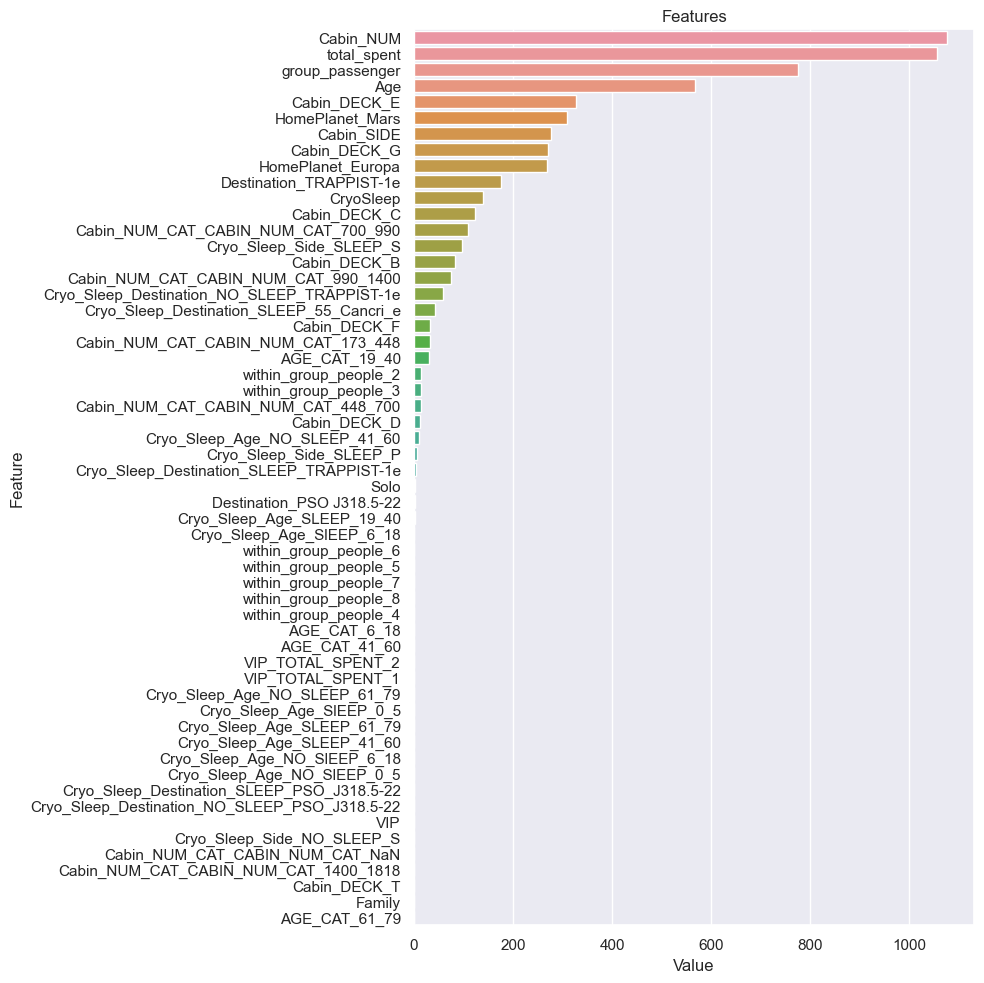

In [123]:
#calls the plot_importance function, which generates a bar plot showing the importance of each feature in the LightGBM model (lgbm_final). 
plot_importance(lgbm_final, X)

In [121]:
cv_results_lgbm = cross_validate(lgbm_final, X, y, cv=10, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

print (f'Accuracy - : {cv_results_lgbm["test_accuracy"].mean()}')
print (f'Precision - : {cv_results_lgbm["test_precision"].mean()}')
print (f'Recall - : {cv_results_lgbm["test_recall"].mean()}')
print (f'F1 - : {cv_results_lgbm["test_f1"].mean()}')
print (f'roc_auc_score - : {cv_results_lgbm["test_roc_auc"].mean()}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3940, number of negative: 3883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 7823, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503643 -> initscore=0.014573
[LightGBM] [Info] Start training from score 0.014573
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3940, number of negative: 3883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

In [124]:
#predict Method:lgbm_final.predict(df_test): This method uses the trained LightGBM model (lgbm_final) to predict the target variable for the given test dataset (df_test).
#Assigning Predictions:The predictions are stored in the variable pred.
pred = lgbm_final.predict(test)
pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [127]:
#combining the passenger IDs with their corresponding predictions into a single DataFrame.
#pd.concat is used to concatenate two or more DataFrames along a particular axis.
#axis=1: This specifies that the concatenation should be done column-wise (i.e., add the pred DataFrame as additional columns to P_ID).
final = pd.concat([P_ID, pd.DataFrame(pred)], axis=1)

In [128]:
#sets the column names of the final DataFrame to "PassengerId" and "Transported".
final.columns = ["PassengerId","Transported"]
#converts the values in the "Transported" column to boolean type. This is often done when the predictions are binary (e.g., 0 or 1) and we want to represent them as boolean values (e.g., False or True).
final["Transported"]= final["Transported"].astype("bool")
final

PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01        False
4        0023_01        False
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01        False
4276     9277_01         True

[4277 rows x 2 columns]

## 7. Saving the Result

In [129]:
#creates a csv of the final result
final.to_csv("predictions_LightGBM.csv", index= False)